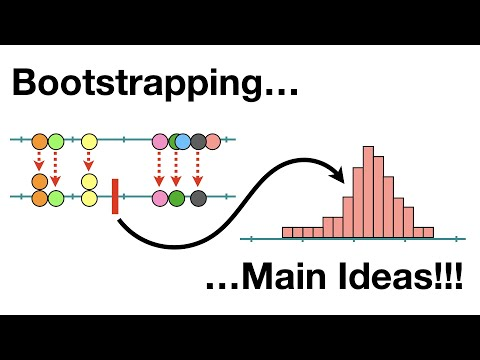

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Xz0x-8-cgaQ', width=800, height=500)

1.) The standard error of the mean captures the average distance of all of the means, from the mean value calculated from all of the sample means, ie the true population mean. The standard deviation of the original data captures the mean distance of each data point from the overall mean value of the original data points. 

2.) We can use the critical value of a 95% confidence interval, which is 1.96. To find this critical value, you can use a function such as invNorm on a calculator, inputting 0.975 as the area value. Then, to create the confidence interval, you can do (mean of the sample means - 1.96 * standard error of means) for the lower end, and (mean of the sample means + 1.96 * standard error of means) for the upper bound of the interval. 

3.) You can sort the sample means in ascending order, then find the 2.5th percentile and the 97.5th percentile to calculate the 95% confidence interval. In order to do this, you can use np.quantile (eX: np.quantile(boostrap_means, 0.025). 

# 4

In [2]:
import numpy as np

# Step 1: Generate a random sample from a population
np.random.seed(42)  # Set seed for reproducibility
population_size = 10000
population = np.random.normal(loc=50, scale=10, size=population_size)  # Normal distribution with mean=50, std=10

# Take a random sample from the population
sample_size = 100
sample = np.random.choice(population, size=sample_size, replace=False)

# Step 2: Define the number of bootstrap samples
n_bootstraps = 1000

# Step 3: Generate bootstrap samples and calculate their means
bootstrap_means = []
for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(sample, size=len(sample), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample)) # here, calculate another parameter (ie standard dev,median)

# Step 4: Sort the bootstrapped means
bootstrap_means = np.sort(bootstrap_means) 

# Step 5: Calculate the 95% confidence interval using np.quantile()
lower_bound = np.quantile(bootstrap_means, 0.025)
upper_bound = np.quantile(bootstrap_means, 0.975)

# Step 6: Output the confidence interval and sample mean
sample_mean = np.mean(sample)
print(f"Sample Mean: {sample_mean}")
print(f"95% Bootstrap Confidence Interval for the Population Mean: [{lower_bound}, {upper_bound}]")


Sample Mean: 51.16787915349687
95% Bootstrap Confidence Interval for the Population Mean: [48.95308021408393, 53.14262971820128]


ChatGPT Link for Q1-4: https://chatgpt.com/share/66fb4195-152c-8011-8c03-0188ee6b734c

5.) A population parameter is usually an unknown value that describes an aspect of a population. It is usually unknown because it can be impractical or nearly impossible to calculate it directly. A sample statistic is a value calculated from a sample that is used to estimate the population. The distinction is important as confidence intervals are calculated using sample statistics to estimate a population parameter. 

# 6

> 1.) The process of bootstrapping is sampling with replacement of the original sample over a large number of times. You can then calculate the sampling distribution of the statistic to estimate the corresponding population parameter. 

> 2.) The main purpose of bootstrapping is to be able to get a more accurate sampling distribution to estimate a population parameter without having to go through the time, money, and effort of doing multiple samplings. It is also a flexible method, allowing for different types of sample statistics to be calculated. 

> 3.) You can use bootstrapping and sample with replacement from the sample of size n a large amount of times, and then calculate the sample means and create a distribution of them to estimate the population parameter. 

7.) The C.I signifies that we can say with 95% confidence that the interval captures the true population mean. With 0 being in this interval, we cannot reject the null hypothesis that the drug has no effect on the patients, as it is part of that 95% confidence. If 0 was not in the C.I, we are 95% confident that 0 is not the true population mean, which means we can safely reject the null hypothesis 

# 8

Problem Introduction 

> We will be investigating whether the new vaccine created by AliTech truly improves the health of those who take it. The null hypothesis in this test is that there is no effect of the vaccines on the health scores of the patients, while the alternative hypothesis is that there is an effect of the vaccines on the health scores of the patients. 

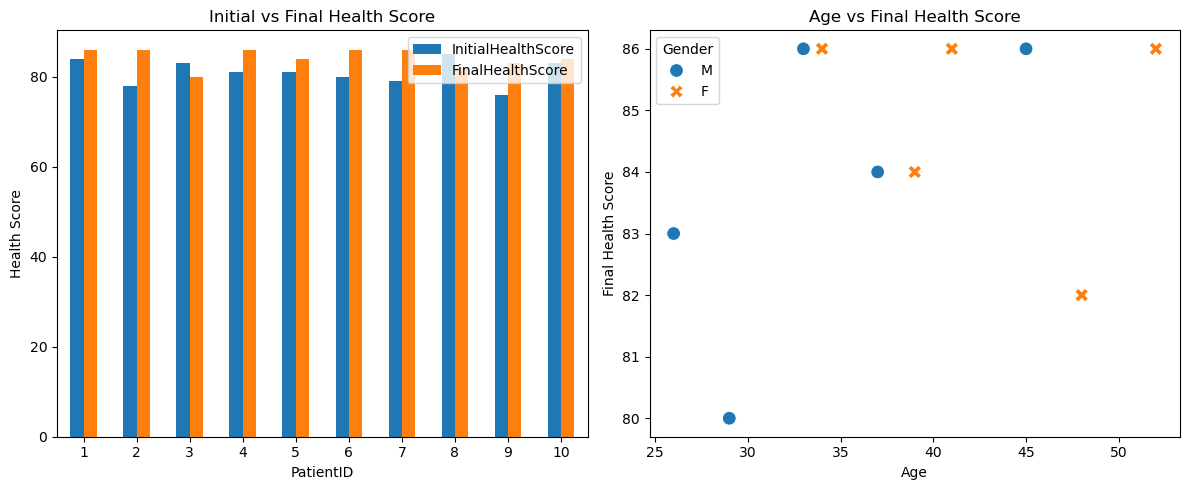

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Set the figure size
plt.figure(figsize=(12, 5))

# Bar Plot for Initial and Final Health Scores
plt.subplot(1, 2, 1)
df.set_index('PatientID')[['InitialHealthScore', 'FinalHealthScore']].plot(kind='bar', ax=plt.gca())
plt.title('Initial vs Final Health Score')
plt.ylabel('Health Score')
plt.xticks(rotation=0)

# Scatter Plot for Age vs Final Health Score
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Age', y='FinalHealthScore', hue='Gender', style='Gender', s=100)
plt.title('Age vs Final Health Score')
plt.xlabel('Age')
plt.ylabel('Final Health Score')

plt.tight_layout()
plt.show()


Quantitative Analysis 

> Methodology: We will be using the bootstrapping sampling method to calculate the mean difference in health scores of the patients before and after receiving the vaccine. We will then calculate a 95% confidence interval to see whether we can reject the null hypothesis. 

Mean of Bootstrapped Health Score Differences: 3.30
Standard Deviation of Bootstrapped Means: 1.22
95% Confidence Interval: (0.70, 5.50)


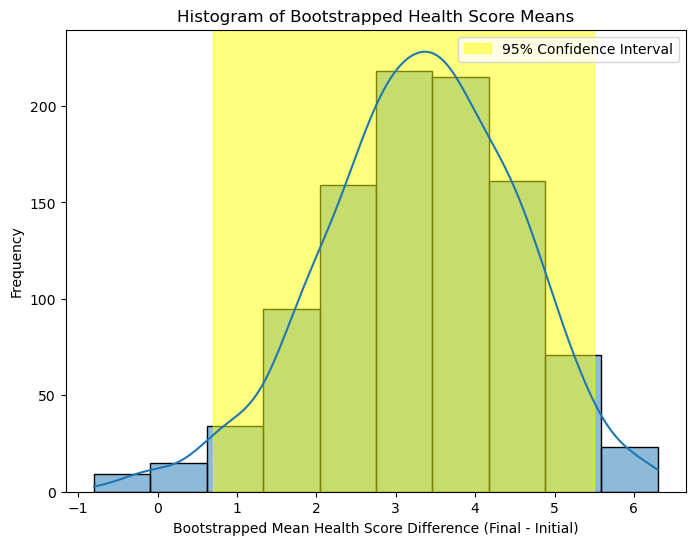

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame
data = {
    'PatientID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age': [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M', 'F'],
    'InitialHealthScore': [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore': [86, 86, 80, 86, 84, 86, 86, 82, 83, 84]
}

df = pd.DataFrame(data)

# Calculate the health score differences
df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Bootstrapping function
def bootstrap_mean_difference(data, n_iterations=1000):
    sample_means = []
    
    for _ in range(n_iterations):
        # Sample with replacement
        sample = np.random.choice(data, size=len(data), replace=True)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    
    return sample_means

# Run bootstrap
bootstrapped_means = bootstrap_mean_difference(df['HealthScoreDifference'])

# Calculate mean and standard deviation of bootstrapped means
mean_bootstrap = np.mean(bootstrapped_means)
std_bootstrap = np.std(bootstrapped_means)

# Calculate 95% confidence interval
ci_lower = np.percentile(bootstrapped_means, 2.5)
ci_upper = np.percentile(bootstrapped_means, 97.5)

# Print mean, standard deviation, and confidence interval
print(f"Mean of Bootstrapped Health Score Differences: {mean_bootstrap:.2f}")
print(f"Standard Deviation of Bootstrapped Means: {std_bootstrap:.2f}")
print(f"95% Confidence Interval: ({ci_lower:.2f}, {ci_upper:.2f})")

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the histogram of bootstrapped means
sns.histplot(bootstrapped_means, bins=10, kde=True)
plt.title('Histogram of Bootstrapped Health Score Means')
plt.xlabel('Bootstrapped Mean Health Score Difference (Final - Initial)')
plt.ylabel('Frequency')

# Highlight the 95% confidence interval
plt.axvspan(ci_lower, ci_upper, color='yellow', alpha=0.5, label='95% Confidence Interval')

# Add a legend
plt.legend()

# Display the plot
plt.show()


Findings and Discussion
> After using bootstrap method to calculate the sample mean difference of the patients health score before and after taking the vaccine, we found that the mean of the differences was 3.3, and the standard deviation was 1.22. Calculating the 95% C.I from this, we found that the lower bound was a difference of 0.7, and the upper bound was 5.5. Since 0 is not in the interval we are safe to reject the null hypothesis, and conclude that the vaccine does have an effect on the health of its patients. Since the 95% confidence interval also included only positive values, we can further conclude that the vaccine has a positive effect on its patients, having their final health score be higher than their initial health score. However, since this was not an experiment, we cannot prove that the vaccine actually caused their higher health scores. It could have been that these patients already had a potential of being healthier, or that it was other aspects of their lifestyle that highered their health score. 

ChatGPT conversation link for Q5-8: https://chatgpt.com/share/66fb4ef4-2828-8011-8ac8-76a720bbc1c4
https://chatgpt.com/share/66fb4eff-b92c-8011-95c4-63c5e1e56fcf

9.) Yes